## Figure 4a

/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWar

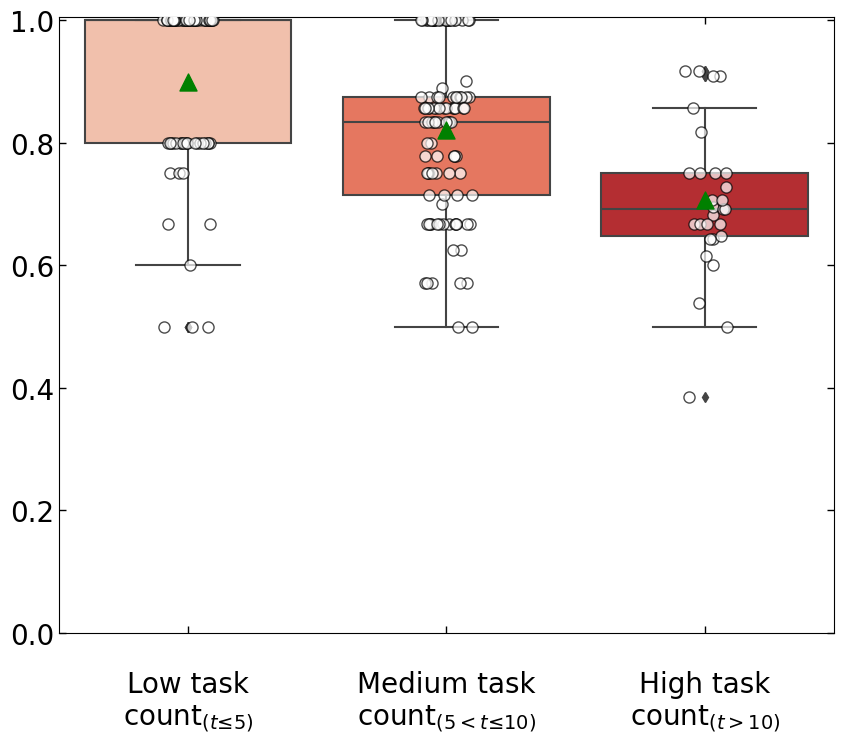

In [287]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

def plot_box_plot_ast(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Define the bin edges
    bins = [0, 5, 10, 25]

    # Define the bin labels
    labels = ['\nLow task\ncount$_{(\it{t}≤5)}$', '\nMedium task\ncount$_{(5<\it{t}≤10)}$', '\nHigh task\ncount$_{(\it{t}>10)}$']

    # Create a new column 'task_count_group' with the assigned groups
    analysis_df['task_count_group'] = pd.cut(analysis_df['task_count'], bins=bins, 
                                             labels=labels, 
                                             include_lowest=True)

    # Create a boxplot
    sns.boxplot(data=analysis_df, x='task_count_group', y='RTI_rescaled', dodge=True, palette='Reds'
               )

    # Create a stripplot without legend
    stripplot = sns.stripplot(data=analysis_df, x='task_count_group', y='RTI_rescaled', dodge=True, alpha=.7, color='white', 
                              edgecolor='black', linewidth=1, size=8, legend=False)

    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(0, 1.05)

    # Set the face color
    plt.gca().set_facecolor('#ffffff')

    # Add inward-facing major and minor tick marks to all axes
    plt.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True,
        labelsize=20,
        width=1,
        length=5
    )

    # Calculate and plot the mean as blue triangles
    means = analysis_df.groupby('task_count_group')['RTI_rescaled'].mean()
    for i, mean in enumerate(means):
        plt.scatter(i, mean, marker='^', color='green', s=150, zorder=5)

    # Move the legend above the plot and set ncol to 1
    legend = plt.legend(title='', fontsize=14, frameon=False, ncol=1)

    plt.ylim(0,1.005)
    
    # Increase figure size
    plt.gcf().set_size_inches(10, 8)

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig4a.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_box_plot_ast(save=True)

## Figure 4b

/tmp/ipykernel_2122/3665912636.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = cm.get_cmap('viridis')


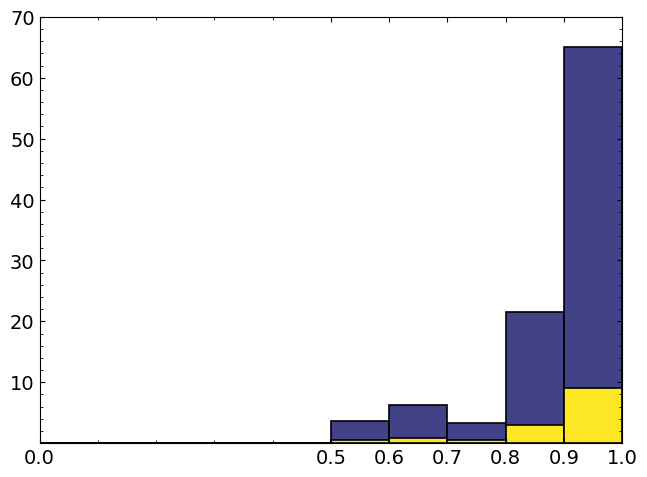

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path

def plot_custom_histogram(save=False):
    # Load dataframe
    data_path = Path('../data/processed/202308-services-list-w-transaction-vol-processed.xlsx')
    df = pd.read_excel(data_path)

    # Add RTI_rescaled column
    df['RTI_rescaled'] = (df['RTI'] + 1) / 2

    # Calculate the percentage of transaction_value for each bin across all services (n=377)
    allserv_total_transactions = df['transaction_value'].sum()

    # Calculate the percentage of transaction_value for each bin across transactional services (n=201)
    transservices_total_transactions = df.loc[df['RTI'].notnull()].transaction_value.sum()    
   
    # Get the viridis colormap
    viridis_cmap = cm.get_cmap('viridis')

    # Plot the histograms
    plt.hist(
        df['RTI_rescaled'], 
        bins=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
        color=viridis_cmap(50), 
        edgecolor='black', 
        linewidth=1.2, 
        weights=df['transaction_value']/transservices_total_transactions*100
    )
    plt.hist(
        df['RTI_rescaled'], 
        bins=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
        color=viridis_cmap(300), 
        edgecolor='black', linewidth=1.2, 
        weights=df['transaction_value']/allserv_total_transactions*100
    )
    plt.tight_layout()
    plt.gca().set_facecolor('#ffffff')
    plt.tick_params(axis='both', which='both', direction='in', labelsize=14)
    plt.minorticks_on()  # Enable minor ticks
    plt.grid(False)  # Turn off gridlines
    plt.tick_params(axis='y', which='both', direction='in', right=True, labelsize=14)
    plt.tick_params(axis='x', which='both', direction='in', top=True, labelsize=14)
    plt.xticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1], rotation=0)
    plt.xlim(0,1)
    plt.ylim(0.001,70)
    
    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig4b.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

# Example usage:
plot_custom_histogram(save=True)

#### Validating transaction value percentage (y-axis in Fig. 4b)

In [22]:
data_path = Path('../data/processed/202308-services-list-w-transaction-vol-processed.xlsx')
df = pd.read_excel(data_path)

# Add RTI_rescaled column
df['RTI_rescaled'] = (df['RTI'] + 1) / 2

# Compute total transaction vol across all services (n=377)
total_vol = df.transaction_value.sum()

# Compute volume of service with AST > 0.9 (n=70)
AST_09_vol = df.loc[df['RTI_rescaled'] > 0.9].transaction_value.sum() 

# Print percentage of total (n=377)
(AST_09_vol / total_vol) * 100

9.051139830966271

In [29]:
# Compute total transaction volume of transactional services (n=201)
trans_total_vol = df.loc[df['RTI'].notnull()].transaction_value.sum()

# Print percentage of transaction services (n=201)
(AST_09_vol / trans_total_vol) * 100

64.99828536888907

In [276]:
# Count the number of services in each bin
bin_counts = df['RTI_rescaled'].value_counts(bins=[0, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).sort_index()

# Print the bin counts
print(bin_counts)

(-0.001, 0.5]     7
(0.5, 0.6]        8
(0.6, 0.7]       30
(0.7, 0.8]       47
(0.8, 0.9]       39
(0.9, 1.0]       70
Name: count, dtype: int64


### Figure 4c

In [70]:
analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

df = analysis_df.loc[analysis_df['rubric_score_manual'].notnull()][['service', 'task_count', 'RTI', 'rubric_score_manual', 'topic', 'organisation']].sort_values(by='rubric_score_manual')

for i in ['LP', 'MP', 'HP']: 
    print(len(df.loc[df['rubric_score_manual'] == i].organisation.unique()))
    print(df.loc[df['rubric_score_manual'] == i].topic.unique())
    print('\n')

4
['National security' 'Business and self-employed' 'Benefits'
 'Visas and immigration']


7
['Benefits' 'Working, jobs and pensions'
 'Citizenship and living in the UK' 'Business and self-employed'
 'Visas and immigration' 'Crime, justice and the law'
 'Environment and countryside']


1
['Environment and countryside']


